# Unemployment Analysis and Prediction in India and Pakistan

## Importing Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import seaborn as sns

## Data Collection and Preprocessing

### Importing Dataset

In [114]:
unemploy_sex_age_edu = 'data/raw/unemployment_sex_age_edu.csv'
unemploy_sex_age_marital = 'data/raw/unemployment_sex_age_martial.csv'
unemploy_sex_age_region = 'data/raw/unemployment_sex_age_region.csv'
population = 'data/raw/population.csv'
inflation = 'data/raw/inflation.csv'
gdp = 'data/raw/gdp.csv'
unemployment_rate = 'data/raw/unemployment_rate.xlsx'

unemploy_sex_age_edu_df = pd.read_csv(unemploy_sex_age_edu)
unemploy_sex_age_marital_df = pd.read_csv(unemploy_sex_age_marital)
unemploy_sex_age_region_df = pd.read_csv(unemploy_sex_age_region)
population_df = pd.read_csv(population)
inflation_df = pd.read_csv(inflation)
gdp_df = pd.read_csv(gdp)
unemployment_rate_df = pd.read_excel(unemployment_rate)

### Dropping unnecessary columns

In [115]:
unemploy_sex_age_edu_df = unemploy_sex_age_edu_df.drop(['source.label', 'indicator.label', 'obs_status.label', 'note_classif.label', 'note_indicator.label', 'note_source.label'], axis=1)
unemploy_sex_age_marital_df = unemploy_sex_age_marital_df.drop(['source.label', 'indicator.label', 'obs_status.label', 'note_classif.label', 'note_indicator.label', 'note_source.label'], axis=1)
unemploy_sex_age_region_df = unemploy_sex_age_region_df.drop(['source.label', 'indicator.label', 'obs_status.label', 'note_classif.label', 'note_indicator.label', 'note_source.label'], axis=1)

In [116]:
countries = ['India', 'Pakistan']
population_df = population_df[population_df['Country Name'].isin(countries)]
years = [str(year) for year in range(2015,2024)]
population_df = population_df.loc[:,['Country Name']+years]

inflation_df = inflation_df[inflation_df['Country Name'].isin(countries)]
years = [str(year) for year in range(2015,2024)]
inflation_df = inflation_df.loc[:,['Country Name']+years]

gdp_df = gdp_df[gdp_df['Country Name'].isin(countries)]
years = [str(year) for year in range(2015,2024)]
gdp_df = gdp_df.loc[:,['Country Name']+years]

### Renaming Columns

In [117]:
unemploy_sex_age_edu_df.rename(columns={
    'ref_area.label': 'country',
    'sex.label': 'gender',
    'classif1.label': 'age_bracket',
    'classif2.label': 'education',
    'obs_value': 'value'
}, inplace=True)

unemploy_sex_age_marital_df.rename(
    columns={
        'ref_area.label': 'country',
        'sex.label': 'gender',
        'classif1.label': 'age_bracket',
        'classif2.label': 'marital_status',
        'obs_value': 'value'
    }, inplace=True
)

unemploy_sex_age_region_df.rename(
    columns={
        'ref_area.label': 'country',
        'sex.label': 'gender',
        'classif1.label': 'age_bracket',
        'classif2.label': 'region',
        'obs_value': 'value'
    }, inplace=True
)

population_df.rename(columns={'Country Name':'country'}, inplace=True)
inflation_df.rename(columns={'Country Name':'country'}, inplace=True)
gdp_df.rename(columns={'Country Name':'country'}, inplace=True)

### Handling rows and null values

#### Unemployment (Gender, Age, Education) Dataset

In [118]:
unemploy_sex_age_edu_df['gender'] = unemploy_sex_age_edu_df['gender'].str.replace('Sex: ','')
unemploy_sex_age_marital_df['gender'] = unemploy_sex_age_marital_df['gender'].str.replace('Sex: ', '')
unemploy_sex_age_region_df['gender'] = unemploy_sex_age_region_df['gender'].str.replace('Sex: ', '')

unemploy_sex_age_edu_df['age_bracket'] = unemploy_sex_age_edu_df['age_bracket'].str.replace('Age (Aggregate bands): ','')
unemploy_sex_age_marital_df['age_bracket'] = unemploy_sex_age_marital_df['age_bracket'].str.replace('Age (Aggregate bands): ','')
unemploy_sex_age_region_df['age_bracket'] = unemploy_sex_age_region_df['age_bracket'].str.replace('Age (Aggregate bands): ','')

unemploy_sex_age_edu_df['education'] = unemploy_sex_age_edu_df['education'].str.replace('Education (Aggregate levels): ','')

unemploy_sex_age_marital_df['marital_status'] = unemploy_sex_age_marital_df['marital_status'].str.replace('Marital status (Detailed): ',  '')

unemploy_sex_age_region_df['region'] = unemploy_sex_age_region_df['region'].str.replace('Area type: ',  '')

In [119]:
education_to_replace = {
    'Less than basic': 'Below High School',
    'Basic': 'High School', 
    'Intermediate': 'Bachelor\'s',
    'Advanced': 'Master\'s or Higher',
    'Level not stated': 'Not Stated'
}

unemploy_sex_age_edu_df['education'] = unemploy_sex_age_edu_df['education'].replace(education_to_replace)

##### Null Values Handle

In [120]:
unemploy_sex_age_edu_df['value'] = unemploy_sex_age_edu_df.groupby(['age_bracket', 'education'])['value'].transform(lambda x: x.fillna(x.mean()))
unemploy_sex_age_edu_df_value_global_mean = unemploy_sex_age_edu_df['value'].mean()
unemploy_sex_age_edu_df['value'] = unemploy_sex_age_edu_df['value'].fillna(unemploy_sex_age_edu_df_value_global_mean)
unemploy_sex_age_edu_df['value'] = round(unemploy_sex_age_edu_df['value'])

unemploy_sex_age_marital_df['value'] = unemploy_sex_age_marital_df.groupby(['age_bracket', 'marital_status'])['value'].transform(lambda x: x.fillna(x.mean()))
unemploy_sex_age_marital_df_value_global_mean = unemploy_sex_age_marital_df['value'].mean()
unemploy_sex_age_marital_df['value'] = unemploy_sex_age_marital_df['value'].fillna(unemploy_sex_age_marital_df_value_global_mean)
unemploy_sex_age_marital_df['value'] = round(unemploy_sex_age_marital_df['value'])

unemploy_sex_age_region_df['value'] = unemploy_sex_age_marital_df.groupby(['age_bracket', 'marital_status'])['value'].transform(lambda x: x.fillna(x.mean()))
unemploy_sex_age_region_df_value_global_mean = unemploy_sex_age_region_df['value'].mean()
unemploy_sex_age_region_df['value'] = unemploy_sex_age_region_df['value'].fillna(unemploy_sex_age_region_df_value_global_mean)
unemploy_sex_age_region_df['value'] = round(unemploy_sex_age_region_df['value'])

##### Convert Data Types

In [121]:
unemploy_sex_age_edu_df['value'] = unemploy_sex_age_edu_df['value'].astype('int')
unemploy_sex_age_edu_df['gender'] = unemploy_sex_age_edu_df['gender'].astype('category')
unemploy_sex_age_edu_df['age_bracket'] = unemploy_sex_age_edu_df['age_bracket'].astype('category')
unemploy_sex_age_edu_df['education'] = unemploy_sex_age_edu_df['education'].astype('category')
unemploy_sex_age_edu_df['time'] =  pd.PeriodIndex(unemploy_sex_age_edu_df['time'], freq='Q')
unemploy_sex_age_edu_df['time'] = unemploy_sex_age_edu_df['time'].dt.to_timestamp()

unemploy_sex_age_marital_df['value'] = unemploy_sex_age_marital_df['value'].astype('int')
unemploy_sex_age_marital_df['gender'] = unemploy_sex_age_marital_df['gender'].astype('category')
unemploy_sex_age_marital_df['age_bracket'] = unemploy_sex_age_marital_df['age_bracket'].astype('category')
unemploy_sex_age_marital_df['marital_status'] = unemploy_sex_age_marital_df['marital_status'].astype('category')
unemploy_sex_age_marital_df['time'] =  pd.PeriodIndex(unemploy_sex_age_marital_df['time'], freq='Q')
unemploy_sex_age_marital_df['time'] = unemploy_sex_age_marital_df['time'].dt.to_timestamp()

unemploy_sex_age_region_df['value'] = unemploy_sex_age_region_df['value'].astype('int')
unemploy_sex_age_region_df['gender'] = unemploy_sex_age_region_df['gender'].astype('category')
unemploy_sex_age_region_df['age_bracket'] = unemploy_sex_age_region_df['age_bracket'].astype('category')
unemploy_sex_age_region_df['region'] = unemploy_sex_age_region_df['region'].astype('category')
unemploy_sex_age_region_df['time'] =  pd.PeriodIndex(unemploy_sex_age_region_df['time'], freq='Q')
unemploy_sex_age_region_df['time'] = unemploy_sex_age_region_df['time'].dt.to_timestamp()

##### Wide to Long data

In [122]:
def wide2Long(df, value_name):
    df = df.melt(id_vars='country', value_name=value_name, var_name='year')
    df = df[df['year'] >= '2015']
    df['year'] = pd.to_datetime(df['year'], format='%Y')
    return df

population_df = wide2Long(population_df, 'count')
gdp_df = wide2Long(gdp_df, 'rate')
inflation_df = wide2Long(inflation_df, 'rate')

unemployment_rate_df = unemployment_rate_df.melt(id_vars='country', value_name='rate', var_name='year')

## EDA

In [123]:
custom_palette = {
    'India': 'orange',
    'Pakistan': 'green',
}

custome_order = ['India', 'Pakistan']

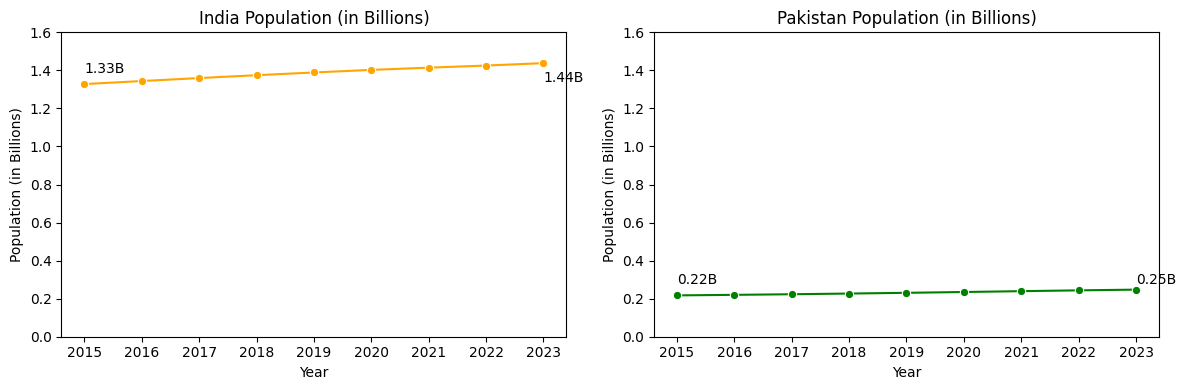

In [124]:
population_df_india = population_df[population_df['country'] == 'India']
population_df_pakistan = population_df[population_df['country'] == 'Pakistan']

population_df_india.loc[:, 'count'] = population_df_india['count']/1000000000
population_df_pakistan.loc[:, 'count'] = population_df_pakistan['count']/1000000000

fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.lineplot(data=population_df_india, x='year', y='count', ax=axes[0], marker='o', color='orange')
axes[0].set_title('India Population (in Billions)')
axes[0].set_ylabel('Population (in Billions)')
axes[0].set_xlabel('Year')
axes[0].set_ylim(0, 1.6)

first_india = population_df_india.iloc[0]
last_india = population_df_india.iloc[-1]
axes[0].annotate(f'{first_india["count"]:.2f}B', xy=(first_india['year'], first_india['count']+0.06))
axes[0].annotate(f'{last_india["count"]:.2f}B', xy=(last_india['year'], last_india['count']-0.1))

sns.lineplot(data=population_df_pakistan, x='year', y='count', ax=axes[1], marker='o', color='green')
axes[1].set_title('Pakistan Population (in Billions)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Population (in Billions)')
axes[1].set_ylim(0, 1.6)

first_pakistan = population_df_pakistan.iloc[0]
last_pakistan = population_df_pakistan.iloc[-1]
axes[1].annotate(f'{first_pakistan["count"]:.2f}B', xy=(first_pakistan['year'], first_pakistan['count']+0.06))
axes[1].annotate(f'{last_pakistan["count"]:.2f}B', xy=(last_pakistan['year'], first_pakistan['count']+0.06))

plt.tight_layout()
plt.show()

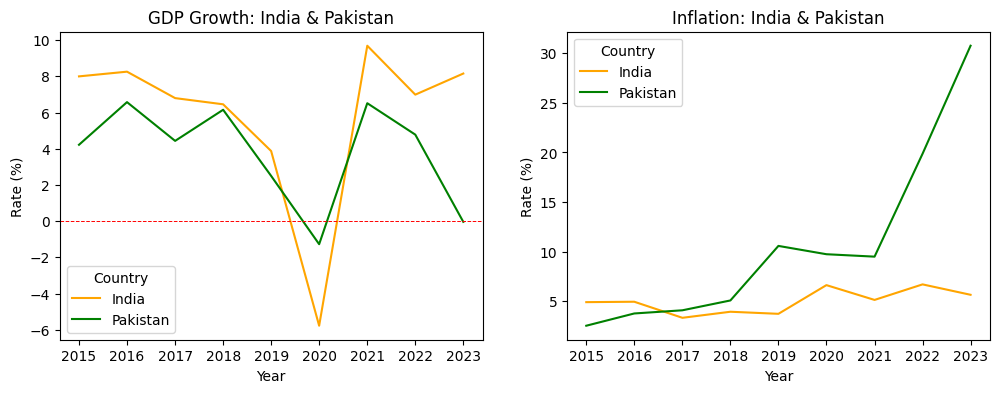

In [125]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.lineplot(data=gdp_df, x='year', y='rate', hue='country', palette=custom_palette, ax=axes[0])
axes[0].legend(title='Country')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rate (%)')
axes[0].set_title('GDP Growth: India & Pakistan')
axes[0].axhline(0, color='red', linestyle='--', linewidth=0.7)

sns.lineplot(data=inflation_df, x='year', y='rate', hue='country', palette=custom_palette, ax=axes[1])
axes[1].legend(title='Country')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Rate (%)')
axes[1].set_title('Inflation: India & Pakistan')

plt.show()

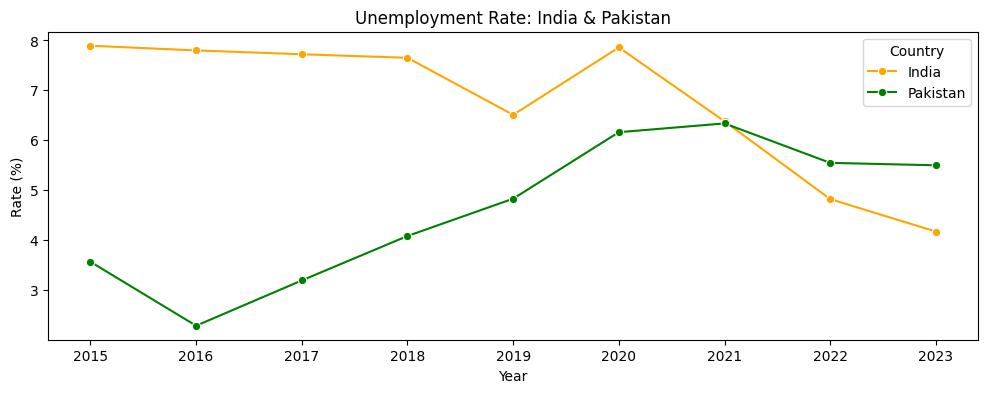

In [126]:
plt.figure(figsize=(12,4))
sns.lineplot(data=unemployment_rate_df, x='year', y='rate', hue='country', marker='o', palette=custom_palette, hue_order=custome_order) 
plt.title('Unemployment Rate: India & Pakistan')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.legend(title='Country')

plt.show()

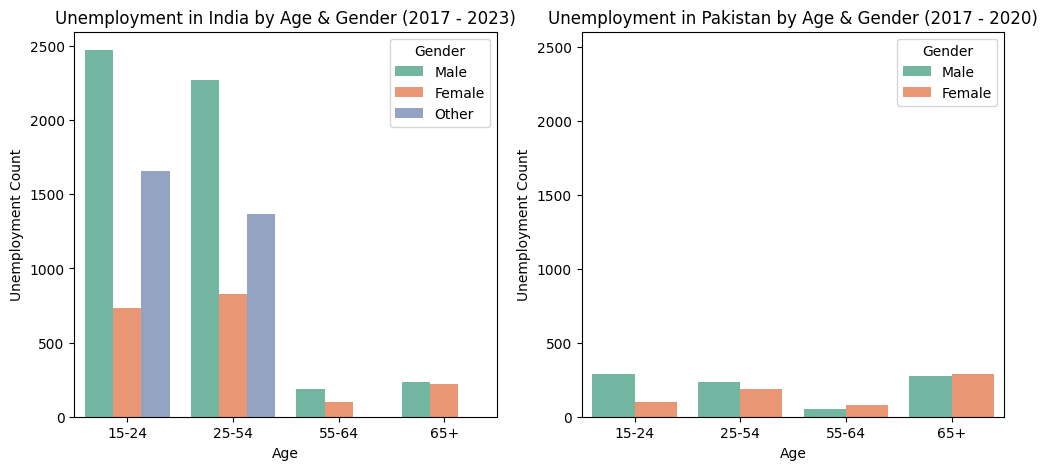

In [127]:
custom_order = ['Male', 'Female', 'Other']
custom_order2 = ['Male', 'Female']
unemploy_sex_age_edu_df_india = unemploy_sex_age_edu_df[unemploy_sex_age_edu_df['country'] == 'India']
unemploy_sex_age_edu_df_india = unemploy_sex_age_edu_df_india.groupby(['time','age_bracket', 'gender'], observed=True)['value'].agg(['mean'])
unemploy_sex_age_edu_df_india = unemploy_sex_age_edu_df_india.reset_index()
unemploy_sex_age_edu_df_pakistan = unemploy_sex_age_edu_df[unemploy_sex_age_edu_df['country'] == 'Pakistan']
unemploy_sex_age_edu_df_pakistan = unemploy_sex_age_edu_df_pakistan.groupby(['time','age_bracket', 'gender'], observed=True)['value'].agg(['mean'])
unemploy_sex_age_edu_df_pakistan = unemploy_sex_age_edu_df_pakistan.reset_index()

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(data=unemploy_sex_age_edu_df_india, x='age_bracket', y='mean', hue='gender', errorbar=None, hue_order=custom_order, palette="Set2", ax=axes[0])
axes[0].legend(title='Gender')
axes[0].set_title('Unemployment in India by Age & Gender (2017 - 2023)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Unemployment Count')

sns.barplot(data=unemploy_sex_age_edu_df_pakistan, x='age_bracket', y='mean', hue='gender', errorbar=None, hue_order=custom_order2, palette="Set2", ax=axes[1])
axes[1].legend(title='Gender')
axes[1].set_title('Unemployment in Pakistan by Age & Gender (2017 - 2020)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Unemployment Count')
axes[1].set_ylim(0, 2600)
plt.show()

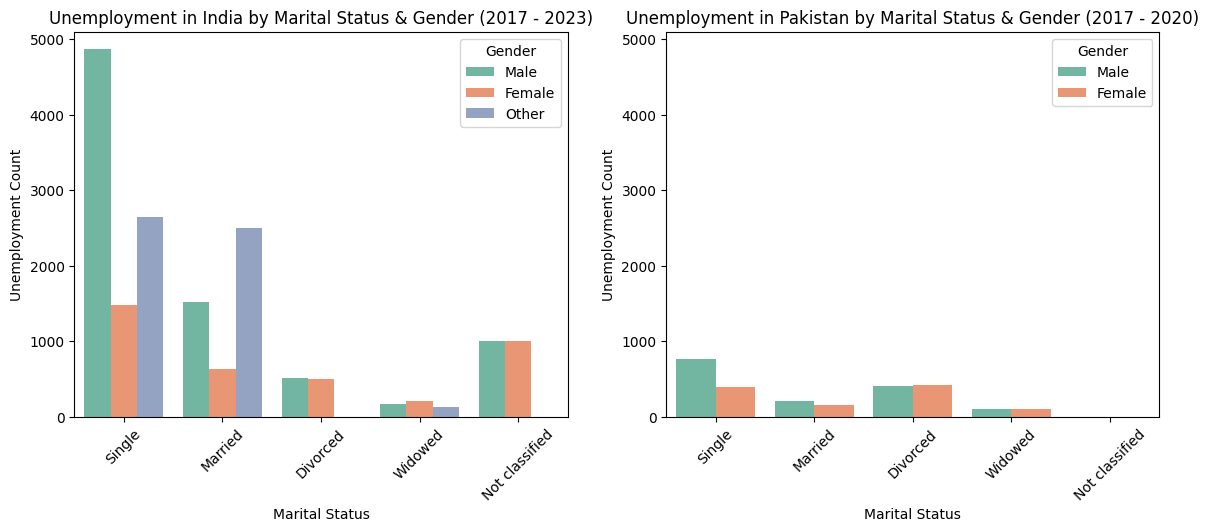

In [144]:
label_order = ['Single', 'Married', 'Divorced', 'Widowed', 'Not classified']
unemploy_sex_age_marital_df_india = unemploy_sex_age_marital_df[unemploy_sex_age_marital_df['country'] == 'India']
unemploy_sex_age_marital_df_india = unemploy_sex_age_marital_df_india.groupby(['time','marital_status', 'gender'], observed=True)['value'].agg(['mean'])
unemploy_sex_age_marital_df_india = unemploy_sex_age_marital_df_india.reset_index()
unemploy_sex_age_marital_df_pakistan = unemploy_sex_age_marital_df[unemploy_sex_age_marital_df['country'] == 'Pakistan']
unemploy_sex_age_marital_df_pakistan = unemploy_sex_age_marital_df_pakistan.groupby(['time','marital_status', 'gender'], observed=True)['value'].agg(['mean'])
unemploy_sex_age_marital_df_pakistan = unemploy_sex_age_marital_df_pakistan.reset_index()

fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.barplot(data=unemploy_sex_age_marital_df_india, x='marital_status', y='mean', hue='gender', errorbar=None, hue_order=custom_order, palette="Set2", ax=axes[0], order=label_order)
axes[0].legend(title='Gender')
axes[0].set_title('Unemployment in India by Marital Status & Gender (2017 - 2023)')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Unemployment Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 5100)

sns.barplot(data=unemploy_sex_age_marital_df_pakistan, x='marital_status', y='mean', hue='gender', errorbar=None, palette="Set2",hue_order=custom_order2, ax=axes[1], order=label_order)
axes[1].legend(title='Gender')
axes[1].set_title('Unemployment in Pakistan by Marital Status & Gender (2017 - 2020)')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Unemployment Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 5100)
plt.show()

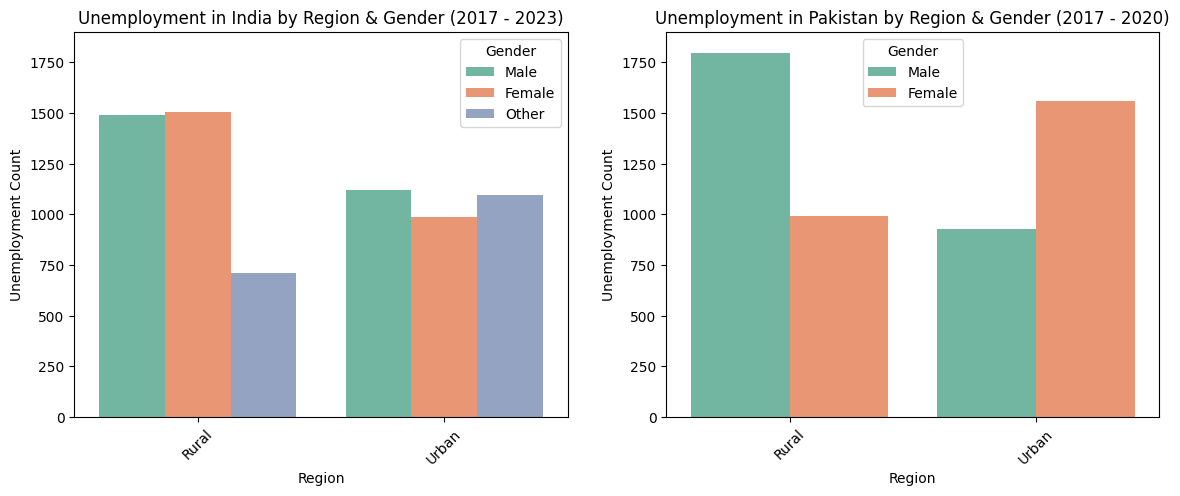

In [145]:
unemploy_sex_age_region_df_india = unemploy_sex_age_region_df[unemploy_sex_age_region_df['country'] == 'India']
unemploy_sex_age_region_df_india = unemploy_sex_age_region_df_india.groupby(['time','region', 'gender'], observed=True)['value'].agg(['mean'])
unemploy_sex_age_region_df_india = unemploy_sex_age_region_df_india.reset_index()
unemploy_sex_age_region_df_pakistan = unemploy_sex_age_region_df[unemploy_sex_age_region_df['country'] == 'Pakistan']
unemploy_sex_age_region_df_pakistan = unemploy_sex_age_region_df_pakistan.groupby(['time','region', 'gender'], observed=True)['value'].agg(['mean'])
unemploy_sex_age_region_df_pakistan = unemploy_sex_age_region_df_pakistan.reset_index()

fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.barplot(data=unemploy_sex_age_region_df_india, x='region', y='mean', hue='gender', errorbar=None, hue_order=custom_order, palette="Set2", ax=axes[0])
axes[0].legend(title='Gender')
axes[0].set_title('Unemployment in India by Region & Gender (2017 - 2023)')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Unemployment Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0,1900)

sns.barplot(data=unemploy_sex_age_region_df_pakistan, x='region', y='mean', hue='gender', errorbar=None, palette="Set2",hue_order=custom_order2, ax=axes[1])
axes[1].legend(title='Gender')
axes[1].set_title('Unemployment in Pakistan by Region & Gender (2017 - 2020)')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Unemployment Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0,1900)
plt.show()